## scikit-learn中的多项式回归和Pipeline

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, 100)

In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [5]:
X2.shape

(100, 3)

In [6]:
X[:5,:]

array([[ 0.15759908],
       [-2.85880151],
       [ 0.29885958],
       [ 2.35843398],
       [ 0.7592388 ]])

In [8]:
X2[:5,:]

array([[ 1.        ,  0.15759908,  0.02483747],
       [ 1.        , -2.85880151,  8.17274608],
       [ 1.        ,  0.29885958,  0.08931705],
       [ 1.        ,  2.35843398,  5.56221085],
       [ 1.        ,  0.7592388 ,  0.57644356]])

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

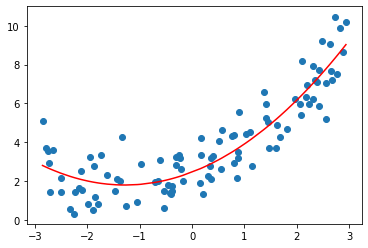

In [10]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [11]:
lin_reg2.coef_

array([0.        , 1.03793878, 0.4046376 ])

In [12]:
lin_reg2.intercept_

2.465746704761228

### 关于PolynomialFeatures

In [14]:
X = np.arange(1, 11).reshape(-1, 2) # 二维边多项式
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [15]:
poly = PolynomialFeatures(degree=2) # 2次
poly.fit(X)
X2 = poly.transform(X)

In [16]:
X2.shape

(5, 6)

In [17]:
X2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

### Pipeline操作

In [21]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

In [22]:
poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)

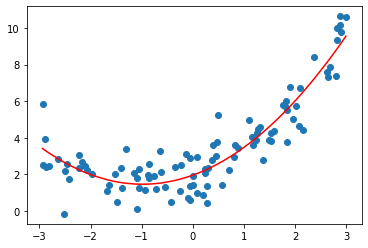

In [23]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()